In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.io.wavfile

import torch
import torch.nn as nn
import torch.nn.functional as F

from tf_utils import Tensorboard

In [3]:
sound = sio.wavfile.read('track.wav')

In [4]:
ns = sound[1].shape[0]
print(ns)

10047744


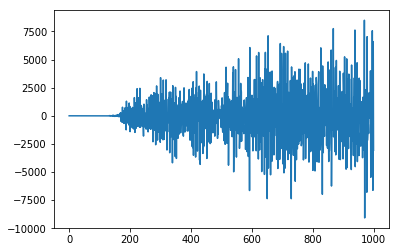

In [5]:
plt.plot(sound[1][0:100000:100, 1])

In [9]:
#nn.Sequential(nn.Linear(1, 120), nn.Linear(120, 84), nn.Linear(84, 1))

Sequential(
  (0): Linear(in_features=1, out_features=120, bias=True)
  (1): Linear(in_features=120, out_features=84, bias=True)
  (2): Linear(in_features=84, out_features=1, bias=True)
)

In [6]:
class Net(nn.Module):
    def __init__(self): 
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)  
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)


In [85]:
help(torch.tensor)

Help on built-in function tensor:

tensor(...)
    tensor(data, dtype=None, device=None, requires_grad=False) -> Tensor
    
    Constructs a tensor with :attr:`data`.
    
    .. warning::
    
        :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
        ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
        or :func:`torch.Tensor.detach`.
        If you have a NumPy ``ndarray`` and want to avoid a copy, use
        :func:`torch.from_numpy`.
    
    .. warning::
    
        When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
        and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
        and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
        The equivalents using ``clone()`` and ``detach()`` are recommended.
    
    Args:
        data (array_like): Initial data for the tenso

In [88]:
from torch.utils.data import TensorDataset, DataLoader


device = torch.device('cuda')
print(device)

data = torch.tensor(sound[1][10000:12000, 0], device=device, dtype=torch.float32)
indexes = torch.tensor(range(len(data)), device=device, dtype=torch.float32)


ds = TensorDataset(indexes, data)

import torch.optim as optim


cuda


In [90]:
dataloader = DataLoader(ds, batch_size=10, shuffle=True, num_workers=0)

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

net.to(device)

Net(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)

In [104]:
help(torch.tensor)

Help on built-in function tensor:

tensor(...)
    tensor(data, dtype=None, device=None, requires_grad=False) -> Tensor
    
    Constructs a tensor with :attr:`data`.
    
    .. warning::
    
        :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
        ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
        or :func:`torch.Tensor.detach`.
        If you have a NumPy ``ndarray`` and want to avoid a copy, use
        :func:`torch.from_numpy`.
    
    .. warning::
    
        When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
        and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
        and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
        The equivalents using ``clone()`` and ``detach()`` are recommended.
    
    Args:
        data (array_like): Initial data for the tenso

In [103]:
t = torch.tensor(np.random.randn(3, 4))
t.

In [107]:
x, y = sample_batched
x

tensor([ 220.,   83., 1208., 1380., 1910.,  931., 1480.,  223., 1612., 1683.],
       device='cuda:0')

In [91]:
epoch = 0
running_loss = 0.0
for i_batch, sample_batched in enumerate(dataloader):
    x, y = sample_batched
    
    optimizer.zero_grad()
    outputs = net(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    print(loss.item())
    if i_batch % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i_batch + 1, running_loss / 2000))
        running_loss = 0.0

RuntimeError: size mismatch, m1: [1 x 10], m2: [1 x 120] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:266